# Gazeta

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!cat '/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'

import codecs
import os
import time
import csv
import sys

from enum import Enum
from collections import Counter
from razdel import tokenize
from razdel import sentenize

from nltk.corpus.reader.api import CorpusReader
from nltk.corpus.reader.api import CategorizedCorpusReader


class PathPattern(Enum):

    doc_pattern = r".*\.csv"
    cat_pattern = r"(\w+)/*"


class CSVCorpusReader(CategorizedCorpusReader, CorpusReader):
    """
    Объект чтения csv файлов для получения возможности
    дополнительной предварительной обработки.
    """

    def __init__(self, root, fileids=PathPattern.doc_pattern.value, encoding='utf8', **kwargs):
        """
        Инициализирует объект чтения промежуточного обработанных файлов
        корпуса.
        """

        # Добавить шаблон категорий, если он не был передан в класс явно
        if not any(key.startswitch('cat_') for key in kwargs.keys()):
            kwargs['cat_pattern'] = PathPattern.cat_pattern.value

        # Инициализировать объекты

In [3]:
!ls /content/gdrive/My\ Drive/experiments/001-exp/scripts/*.py

'/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/experiments/001-exp/scripts/')

In [5]:
!pip install razdel

In [0]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [0]:
import sys

In [0]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [0]:
from reader import CSVCorpusReader

In [0]:
# Создадим объект чтения корпуса
# data = CSVCorpusReader('../../../data/interim')
data = CSVCorpusReader('/content/gdrive/My Drive/data/interim/')

In [9]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'rt', 'tass']

In [10]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv', 'interfax/interfax.csv', 'rt/rt.csv', 'tass/tass.csv']

## Общий предварительный анализ

In [11]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'gazeta')

{'Время обработки в секундах': 1893.3091502189636,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 865852,
 'Количество повторяющихся новостей': 135,
 'Количество предложений': 5101336,
 'Количество пустных новостных элементов': 0,
 'Количество слов': 175154371,
 'Количество токенов (словарь)': 1216626,
 'Количество файлов': 1,
 'Конечная дата в обработке': '2019-05-23 23:45:48',
 'Коэффициент лексического разнообразия (lexical diversity)': 143.96730877032053,
 'Начальная дата в обработке': '2007-03-03 11:17:10',
 'Среднее количество новостей по отношению к файлам': 865852.0,
 'Среднее количество предложений в новостях': 5.89169511648642}

## EDA

### Обработка словаря

In [0]:
# Соберем токены
tokens = data.gettokens

In [0]:
punctuation = list(punctuation)

In [0]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [0]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [0]:
stopwords_01 = open('/content/gdrive/My Drive/data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('/content/gdrive/My Drive/data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [0]:
stopwords = stopwords_01 + stopwords_02

In [0]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [21]:
Counter(tokens).most_common(20)

[('в', 5922207),
 ('и', 3074071),
 ('на', 2714493),
 ('что', 1714750),
 ('с', 1560789),
 ('не', 1357984),
 ('по', 1237102),
 ('а', 564483),
 ('россии', 549400),
 ('о', 544830),
 ('за', 543629),
 ('из', 532533),
 ('к', 487421),
 ('он', 467804),
 ('как', 453070),
 ('это', 441069),
 ('но', 435112),
 ('для', 420782),
 ('у', 394270),
 ('от', 382771)]

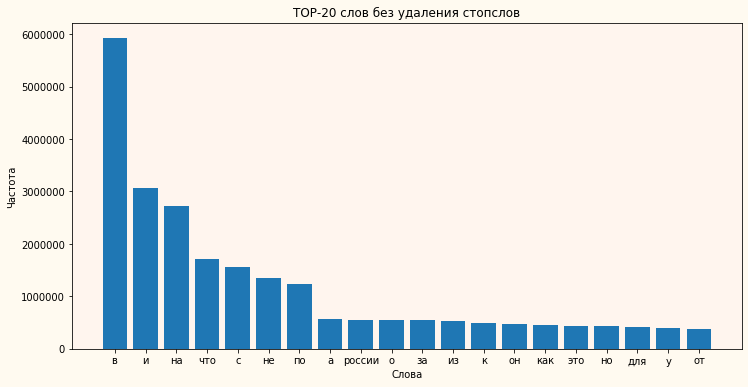

In [22]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [23]:
Counter(tokens_without_stopwords).most_common(20)

[('россии', 549400),
 ('1', 307144),
 ('сообщает', 306119),
 ('заявил', 238615),
 ('2', 221423),
 ('сша', 214919),
 ('передает', 191013),
 ('0', 186080),
 ('странице', 172941),
 ('чемпионата', 166692),
 ('ru', 162614),
 ('новости', 160577),
 ('3', 159566),
 ('сообщалось', 158296),
 ('матче', 138910),
 ('словам', 135448),
 ('команды', 131381),
 ('сборной', 118484),
 ('другими', 118163),
 ('4', 118113)]

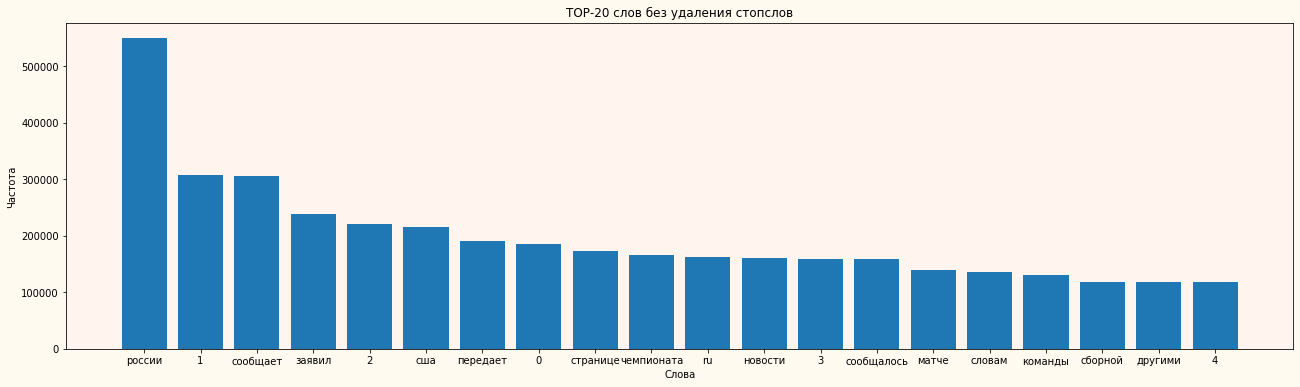

In [24]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [0]:
list_topics = list(data.listcolumns(None, 'gazeta', 'topics'))

In [26]:
len(set(list_topics))

12

### Рубрики в разрезе количества новостей

In [27]:
Counter(list_topics).most_common(12)

[('Спорт', 318909),
 ('Общество', 163391),
 ('Бизнес', 105387),
 ('Политика', 100214),
 ('Авто', 46478),
 ('Культура', 42290),
 ('Армия', 25522),
 ('Технологии', 19386),
 ('Наука', 17258),
 ('Новости', 13252),
 ('Стиль', 12875),
 ('Мнения', 890)]

## Распределение количества новостей по месяцам

In [0]:
list_dates = list(data.listcolumns(None, 'gazeta', 'date'))

In [0]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [0]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x) for x in list_dates]

In [0]:
month_year = Counter(list_dates)

In [32]:
len(month_year)

118

In [33]:
month_year.most_common(20)

[('03-2017', 13194),
 ('07-2017', 12904),
 ('03-2015', 12817),
 ('12-2014', 12773),
 ('04-2017', 12498),
 ('04-2016', 12394),
 ('08-2017', 12344),
 ('12-2016', 12244),
 ('03-2016', 12227),
 ('06-2017', 12188),
 ('10-2017', 11965),
 ('02-2015', 11930),
 ('10-2014', 11869),
 ('04-2015', 11845),
 ('12-2015', 11743),
 ('09-2017', 11689),
 ('02-2017', 11614),
 ('05-2017', 11589),
 ('05-2016', 11551),
 ('06-2015', 11501)]

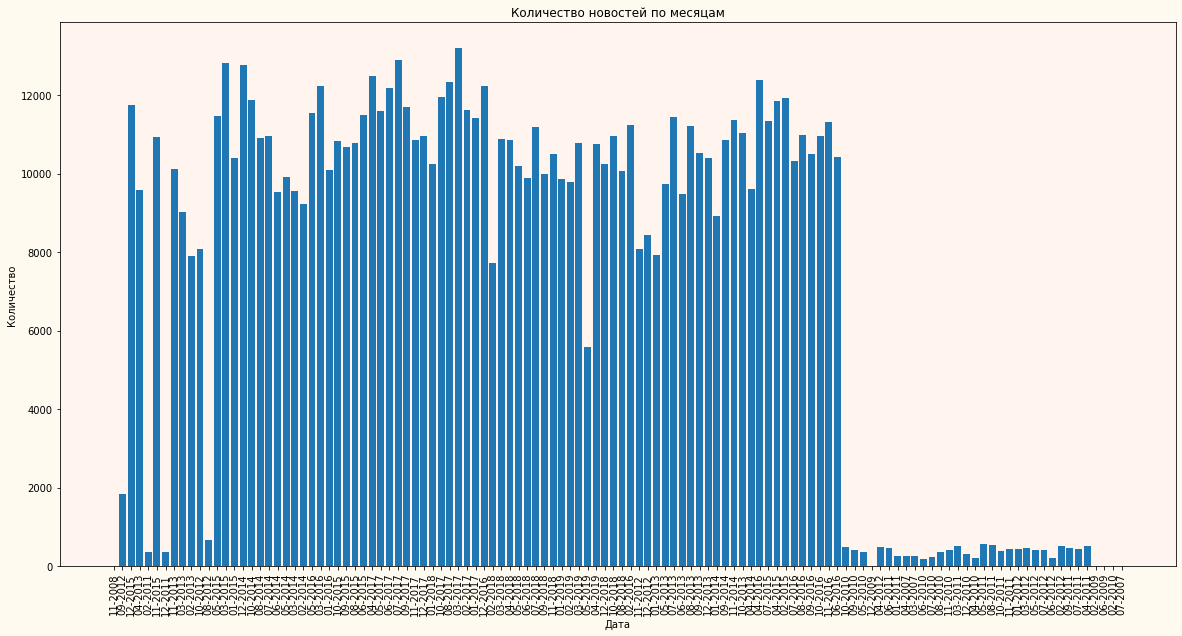

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()